# jammer
## 11- `star_marley.py`  on Gl570D
### 1. Revised priors (run02)


In [13]:
import pandas as pd
from matplotlib.ticker import MaxNLocator

In [14]:
label = [r"$T_{\mathrm{eff}}$", r"$\log{g}$",r"$v_z$", r"$v\sin{i}$", r"$\log{\Omega}$", 
         r"$c^1$", r"$c^2$", r"$c^3$", r"sigAmp", r"logAmp", r"$l$"] 

```bash
gully at gigayear in ~/GitHub/jammer/sf/Gl570D/output/marley_grid/run02 on master [!?]
$ $jammer/code/star_marley.py --samples=5000 --incremental_save=100
keeping grid as is
Using the user defined prior in $jammer/sf/Gl570D/output/marley_grid/run02/user_prior.py
2017 Apr 24, 2:40 PM: 99/5000 = 2.0%
2017 Apr 24, 2:41 PM: 199/5000 = 4.0%
2017 Apr 24, 2:43 PM: 299/5000 = 6.0%
2017 Apr 24, 2:44 PM: 399/5000 = 8.0%
[...]
2017 Apr 24, 3:45 PM: 4699/5000 = 94.0%
2017 Apr 24, 3:47 PM: 4799/5000 = 96.0%
2017 Apr 24, 3:48 PM: 4899/5000 = 98.0%
2017 Apr 24, 3:50 PM: 4999/5000 = 100.0%
The end.
```

In [15]:
ws = np.load("../sf/Gl570D/output/marley_grid/run02/emcee_chain.npy")

In [16]:
burned = ws[:, -1000:,:]
xs, ys, zs = burned.shape
fc = burned.reshape(xs*ys, zs)
nx, ny = fc.shape

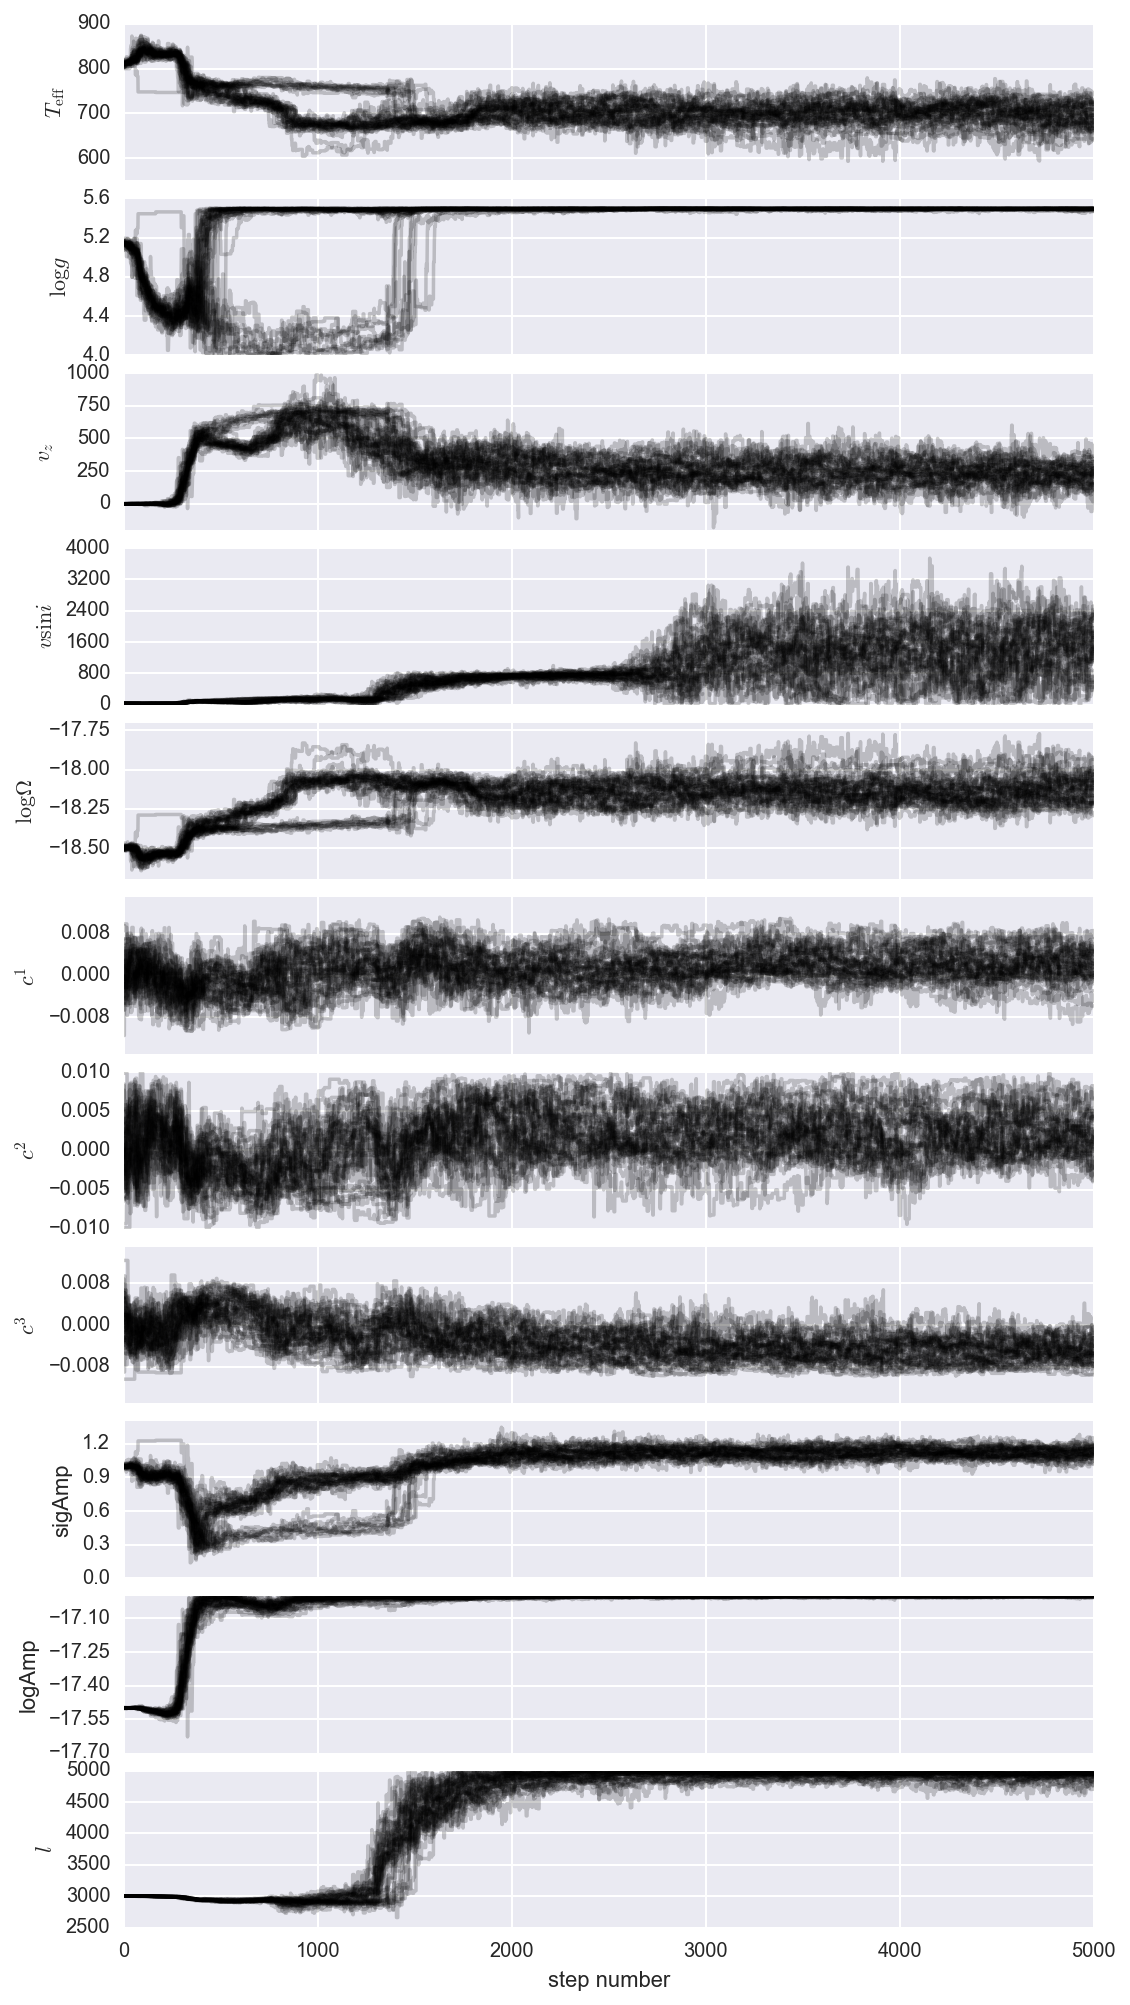

In [17]:
fig, axes = plt.subplots(11, 1, sharex=True, figsize=(8, 14))
for i in range(0, 11, 1):
    axes[i].plot(ws[:, :, i].T, color="k", alpha=0.2)
    axes[i].yaxis.set_major_locator(MaxNLocator(5))
    axes[i].set_ylabel(label[i])

axes[10].set_xlabel("step number")
fig.tight_layout(h_pad=0.0)

Seems reasonable.

## What is the Cheb spectrum doing, in light of the multi-dimensional prior?

In [18]:
x_vec = np.arange(-1, 1, 0.01)

In [19]:
from numpy.polynomial import Chebyshev as Ch

Plot a bunch of random draws from the Cheb polynomials

In [20]:
n_samples, n_dim = fc.shape
n_draws = 900
rand_i = np.random.randint(0, n_samples, size=n_draws)

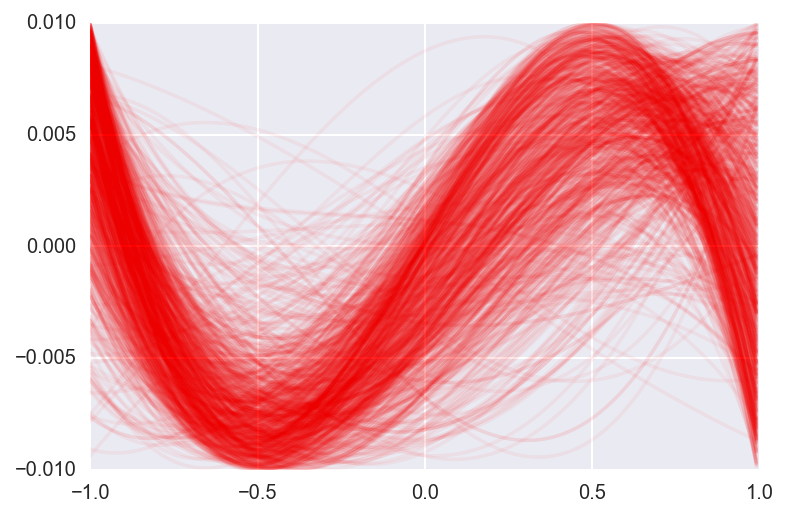

In [21]:
for i in range(n_draws):

    ch_vec = np.array([0]+list(fc[rand_i[i], 5:7+1]))
    ch_tot = Ch(ch_vec)
    ch_spec = ch_tot(x_vec)

    plt.plot(x_vec, ch_spec, 'r', alpha=0.05)

This is probably creating a bias that we don't really want.  We might have to get rid of the Chebyshev polynomials altogether.

## What are we getting compared to *Saumon et al 2006*?

In [22]:
truth_vals = [810.0, 5.15, 0.0, 30.0] # Saumon et al. 2006;  v_z, and vsini made up from plausible values.

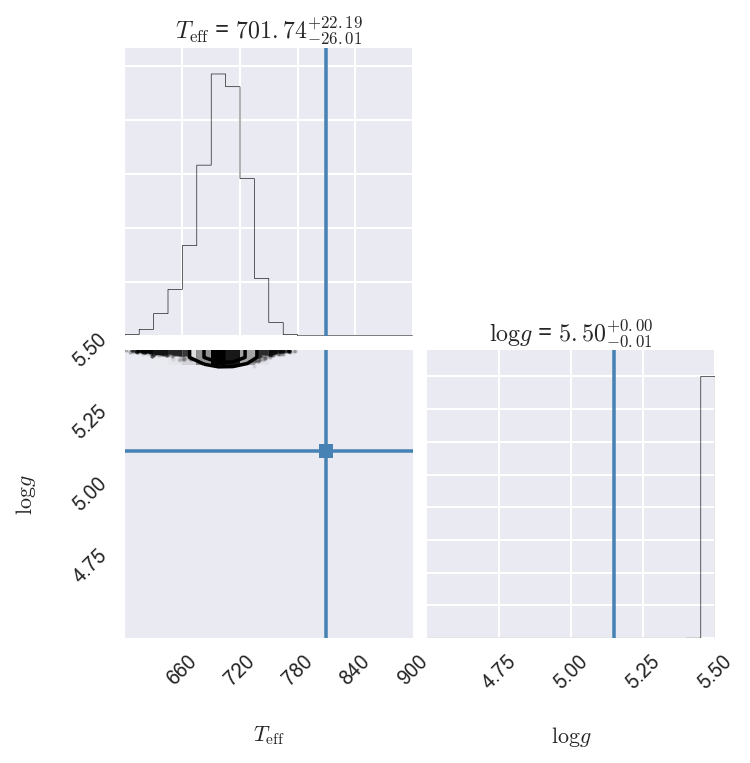

In [23]:
import corner
fig = corner.corner(fc[:, 0:2], labels=label[0:2], show_titles=True, 
                    truths=truth_vals[0:2], range=[(600, 900), (4.5, 5.5)])
fig.savefig('../results/Gl570D_exp2.png', dpi=300)

Systematically off, but maybe not surprisingly so.

## What do the spectra look like?

In [24]:
dat1 = pd.read_csv('../sf/Gl570D/output/marley_grid/run02/spec_config.csv')
dat2 = pd.read_csv('../sf/Gl570D/output/marley_grid/run02/models_draw.csv')

In [25]:
sns.set_style('ticks')

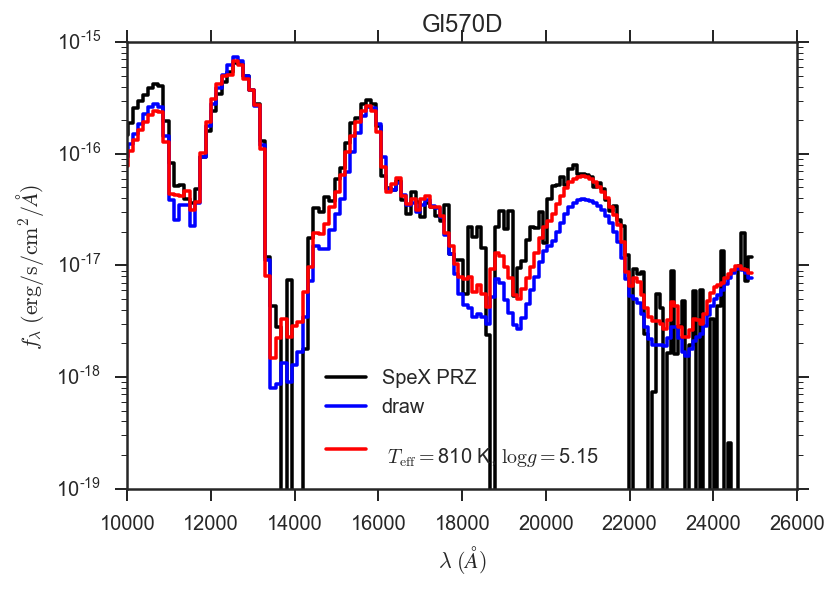

In [26]:
plt.step(dat1.wl, dat1.data, 'k', label='SpeX PRZ')
plt.step(dat1.wl, dat2.model_comp50, 'b', label='draw')
plt.step(dat1.wl, dat1.model_composite, 'r',
         label='\n $T_{\mathrm{eff}}=$810 K, $\log{g}=$5.15')
plt.xlabel('$\lambda \;(\AA)$')
plt.ylabel('$f_\lambda \;(\mathrm{erg/s/cm}^2/\AA)$ ')
plt.title('Gl570D')
plt.legend(loc='best')
plt.yscale('log')
plt.savefig('../results/Gl570D_run02_fit.png', dpi=300, bbox_inches='tight')

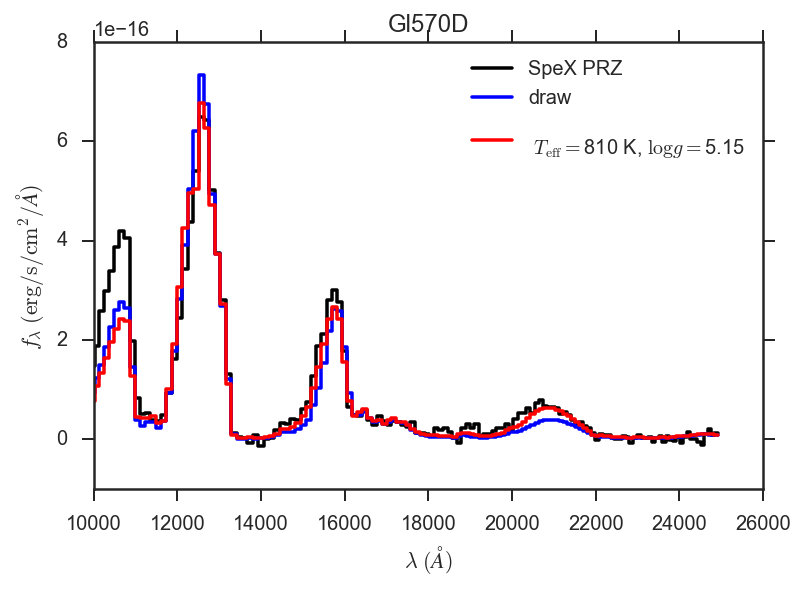

In [27]:
plt.step(dat1.wl, dat1.data, 'k', label='SpeX PRZ')
plt.step(dat1.wl, dat2.model_comp50, 'b', label='draw')
plt.step(dat1.wl, dat1.model_composite, 'r',
         label='\n $T_{\mathrm{eff}}=$810 K, $\log{g}=$5.15')
plt.xlabel('$\lambda \;(\AA)$')
plt.ylabel('$f_\lambda \;(\mathrm{erg/s/cm}^2/\AA)$ ')
plt.title('Gl570D')
plt.legend(loc='best')
plt.yscale('linear')

In [28]:
CC = np.load('../sf/Gl570D/output/marley_grid/run02/CC_new.npy')

In [29]:
from scipy.stats import multivariate_normal

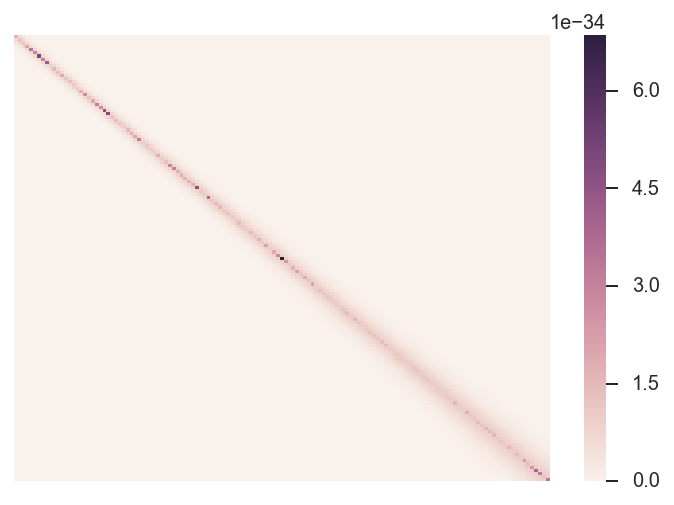

In [30]:
sns.heatmap(CC, xticklabels=False, yticklabels=False)

In [31]:
nz_draw = multivariate_normal(dat2.model_comp50, CC)

In [32]:
nz_resid = multivariate_normal(dat2.model_comp50*0.0, CC)

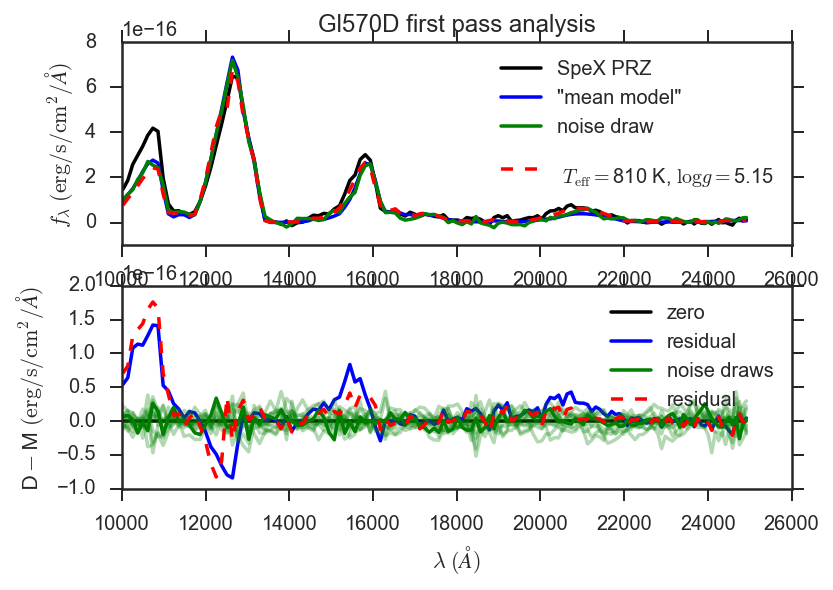

In [33]:
## plt.figure(figsize=(10, 10))
plt.subplot(211)
plt.plot(dat1.wl, dat1.data, 'k-', label='SpeX PRZ')
plt.plot(dat1.wl, dat2.model_comp50, 'b-', label='"mean model"')

plt.plot(dat1.wl, nz_draw.rvs(), 'g-', label='noise draw')
#for i in range(10):
#    plt.plot(dat1.wl, nz_draw.rvs(), 'g-', alpha=0.3)

plt.plot(dat1.wl, dat1.model_composite, 'r--',
         label='\n $T_{\mathrm{eff}}=$810 K, $\log{g}=$5.15')
plt.ylabel('$f_\lambda \;(\mathrm{erg/s/cm}^2/\AA)$ ')
plt.title('Gl570D first pass analysis')
plt.legend(loc='best')
plt.yscale('linear')

plt.subplot(212)
plt.plot(dat1.wl, dat1.data*0.0, 'k-', label='zero')
plt.plot(dat1.wl, dat1.data-dat2.model_comp50, 'b-', label='residual')

plt.plot(dat1.wl, nz_resid.rvs(), 'g-', label='noise draws')
for i in range(10):
    plt.plot(dat1.wl, nz_resid.rvs(), 'g-', alpha=0.3)

plt.plot(dat1.wl, dat1.data-dat1.model_composite, 'r--',
         label='residual')
plt.xlabel('$\lambda \;(\AA)$')
plt.ylabel('$\mathsf{D}-\mathsf{M} \;(\mathrm{erg/s/cm}^2/\AA)$ ')
#plt.title('Residual: (Data - Model)')
plt.legend(loc='best')
plt.yscale('linear')
#plt.savefig('../results/Gl570D_run02_mgs.pdf', bbox_inches='tight')
plt.savefig('../results/Gl570D_run02_mgs.png', dpi=300)

It seems that the `logAmp` on the Gaussian Process is still too strong.  It's also piling up at the prior boundary.  Maybe we should simply assign a normal distribution prior at some low-but-plausible value, like -17.0.


Convert to mJy units.

In [34]:
import astropy.units as u

In [35]:
x = dat1.wl.values*u.Angstrom
x_um = x.to(u.micron).value

In [36]:
c_fac = (u.erg/u.cm**2/u.s/u.Angstrom).to(u.mJy, equivalencies=u.spectral_density(x))

In [37]:
sns.set_context('talk')

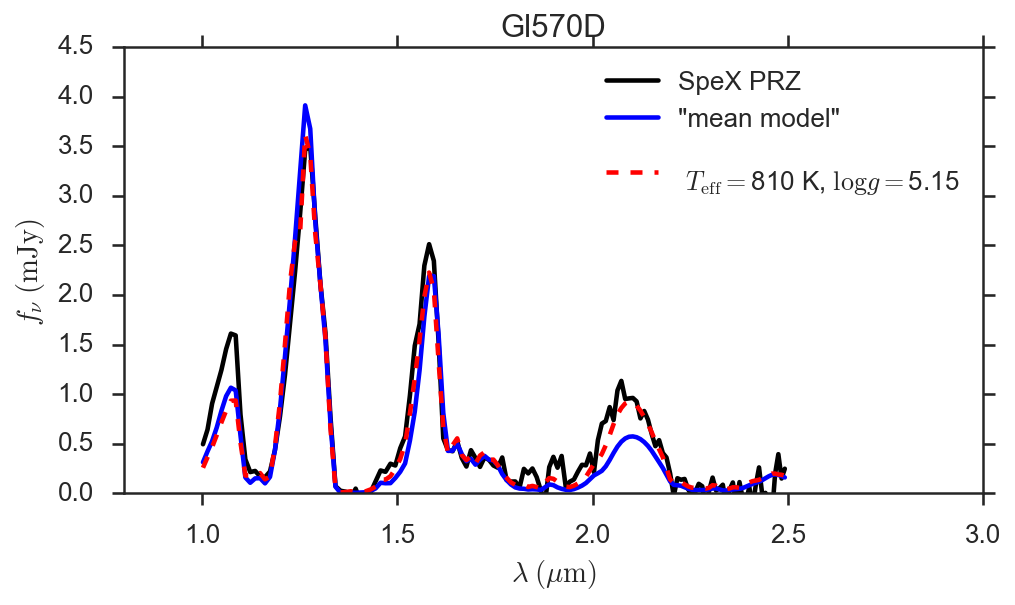

In [38]:
plt.figure(figsize=(7.7, 4))
plt.plot(x_um, dat1.data*c_fac, 'k-', label='SpeX PRZ')
plt.plot(x_um, dat2.model_comp50*c_fac, 'b-', label='"mean model"')

plt.plot(x_um, dat1.model_composite*c_fac, 'r--',
         label='\n $T_{\mathrm{eff}}=$810 K, $\log{g}=$5.15')
plt.ylabel(r'$f_{\nu} \;(\mathrm{mJy})$ ')
plt.ylim(0, 4.5)
plt.xlim(0.8, 3.0)
plt.title('Gl570D')
plt.legend(loc='best')
plt.xlabel('$\lambda \; (\mu \mathrm{m})$')
plt.savefig('../results/Gl570D_cf_Saumon.png', dpi=300, bbox_inches='tight')

<img src='http://iopscience.iop.org/article/10.1086/505419/fulltext/fg2_online.h.jpg' width=500 align='left'></img>

### Figure 2 from Saumon et al. 2006

## Next steps:
1. ~~Re-run with adjusted prior on the GP parameters~~
2. Fix and re-instantiate the `part1` of the spectral emulator covariance matrix
3. Make a variation of grid_tools.py that convolves with a wavelength-dependent resolution kernel.
4. Fit with a resolution kernel, not vsini, re-interpret the 4$^{th}$ parameter as $\sigma_R$.
5. Put a prior on $v_z$ equal to a fraction of a pixel.